Make files for tumor and nontumor tissue

Get "clean" brains 

Get tumors alone

# Slurm script prototype

../lib/BraTS20_Training_232


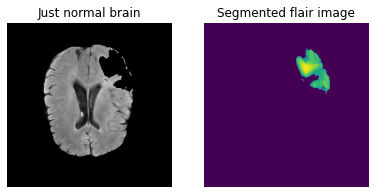

../lib/BraTS20_Training_230


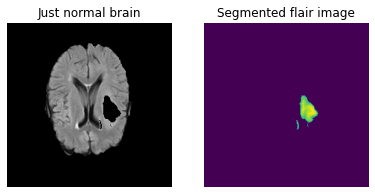

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib


'''
Path to directory containing Brats data (probably LGG or HGG)
'''

#path_to_lib = "../../lib/MICCAI_BraTS2020_TrainingData"
path_to_lib = "../lib"

'''
path to results
'''
path_to_results = "../results/"




'''
Iterate through each MRI folder, extract FLAIR image, and convert to kmeans
'''
for folder_path in pathlib.Path(path_to_lib).iterdir():
    
    if folder_path.is_file()==False:
        print(str(folder_path))
        data_id = folder_path.parts[len(folder_path.parts)-1]



        #load data
        data_flair, affine, im = load_nifti(str(folder_path)+"/"+data_id+"_flair.nii", return_img=True)
        data_seg, affine, im = load_nifti(str(folder_path)+"/"+data_id+"_seg.nii", return_img=True)

        #set non-tumor tissue to zero
        segmented_brain = data_flair.copy()
        segmented_brain[data_seg !=0]=0

        #set tumor tissue to 0
        segmented_tumor=data_flair.copy()
        segmented_tumor[data_seg ==0]=0

        plt.figure(figsize=(10,5))

        plt.subplot(1,3,1).set_axis_off()
        plt.title("Just normal brain")
        plt.imshow(segmented_brain[:,:,80].T, cmap="gray", origin='lower')

        plt.subplot(1,3,2).set_axis_off()
        plt.title("Segmented flair image")
        plt.imshow(segmented_tumor[:,:,80].T,  origin='lower')

        #write data output
        np.save(path_to_results+data_id+"_tumor.npy", segmented_tumor, allow_pickle=True, fix_imports=True)
        np.save(path_to_results+data_id+"_clean.npy", segmented_brain, allow_pickle=True, fix_imports=True)


        plt.show()


Check file by reloading

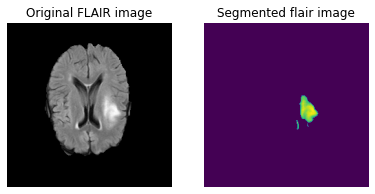

In [9]:
tumor = np.load("../results/BraTS20_Training_230_tumor.npy")
nontumor = np.load("../results/BraTS20_Training_230_clean.npy")
plt.figure(figsize=(10,5))

plt.subplot(1,3,1).set_axis_off()
plt.title("Original FLAIR image")
plt.imshow(data_flair[:,:,80].T, cmap="gray", origin='lower')

plt.subplot(1,3,2).set_axis_off()
plt.title("Segmented flair image")
plt.imshow(tumor[:,:,80].T,  origin='lower')



# calculate mean and variance  of "normal + background" vs. tumor

In [10]:

def calc_mean_var(seg_img):

    section = seg_img[seg_img !=0]
    return np.array([np.mean(section), np.std(section)])

In [14]:
tumor_mean_var = calc_mean_var(tumor)
tumor_mean_var

array([405.14647344,  52.26907295])

In [16]:
nontumor_mean_var = calc_mean_var(nontumor)
nontumor_mean_var

array([233.55514487,  61.39411202])

Compare two populations

In [20]:
from scipy.stats import ttest_ind, norm
ttest_ind(tumor.flatten(), tumor.flatten())

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [22]:
norm.pdf(233, 405, 52)

3.2295054433601224e-05

In [23]:
norm.pdf(400, 405, 52)

0.007636582956533472

# T test

# slurm script

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from dipy.io.image import load_nifti
import pandas as pd
import sklearn.cluster
import pathlib



'''
path to results
'''
path_to_results = "../results/"


tumor_metrics ={}
nontumor_metrics = {}


'''
Iterate through each MRI folder, extract FLAIR image, and convert to kmeans
'''
for path in pathlib.Path(path_to_results).iterdir():

  
        data_id = path.parts[len(path.parts)-1]


        if "tumor" in data_id:
            
            tumor = np.load(str(path))
            tumor_metrics[data_id]=calc_mean_var(tumor)
            
        else:
            nontumor = np.load(str(path))
            nontumor_metrics[data_id]=calc_mean_var(nontumor)
            
            
np.savez(path_to_results+"/nontumor_metrics.npz", **nontumor_metrics)
np.savez(path_to_results+"/tumor_metrics.npz", **tumor_metrics)

KeyError: 'True is not a file in the archive'

In [ ]:
res = np.load("../results/tumor_metrics.npz", allow_pickle=True)
dict(res)

In [31]:
res = np.load("../results/nontumor_metrics.npz", allow_pickle=True)
dict(res)

{'BraTS20_Training_232_clean.npy': array([214.59926631,  59.10282921]),
 'BraTS20_Training_230_clean.npy': array([233.55514487,  61.39411202])}